In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
bank = pd.read_csv('C:/Users/Administrator/Downloads/Python_files_material/Excelr assignments/Logistic Regression/bank-full.csv', sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [56]:
bank.shape

(45211, 17)

In [57]:
bank.drop(['job','age','marital','education','balance','contact','day','month','duration','poutcome'], inplace = True, axis=1)
bank

,default,housing,loan,campaign,pdays,previous,y
0,no,yes,no,1,-1,0,no
1,no,yes,no,1,-1,0,no
2,no,yes,yes,1,-1,0,no
3,no,yes,no,1,-1,0,no
4,no,no,no,1,-1,0,no
...,...,...,...,...,...,...,...
45206,no,no,no,3,-1,0,yes
45207,no,no,no,2,-1,0,yes
45208,no,no,no,5,184,3,yes
45209,no,no,no,4,-1,0,no


In [58]:
bank['y'] = bank['y'].map({'yes':'1','no': '0'})

In [59]:
bank['default'] = bank['default'].map({'yes': 1, 'no': 0})

In [60]:
bank['housing'] = bank['housing'].map({'yes': 1, 'no': 0})

In [61]:
bank['loan'] = bank['loan'].map({'yes': 1, 'no': 0})

In [62]:
bank.head()

,default,housing,loan,campaign,pdays,previous,y
0,0,1,0,1,-1,0,0
1,0,1,0,1,-1,0,0
2,0,1,1,1,-1,0,0
3,0,1,0,1,-1,0,0
4,0,0,0,1,-1,0,0


<AxesSubplot:xlabel='y', ylabel='count'>

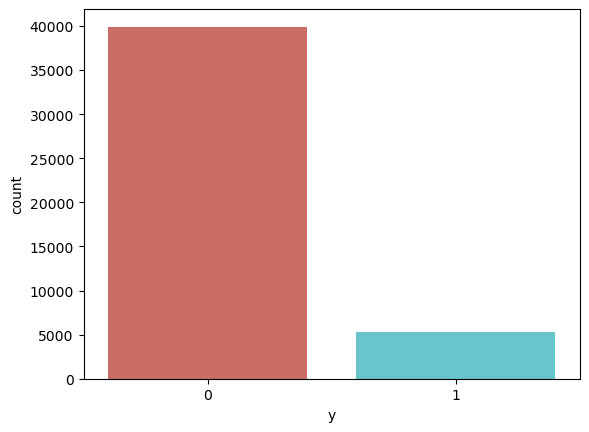

In [63]:
sns.countplot(x = 'y', data = bank, palette = 'hls')

<AxesSubplot:xlabel='loan', ylabel='count'>

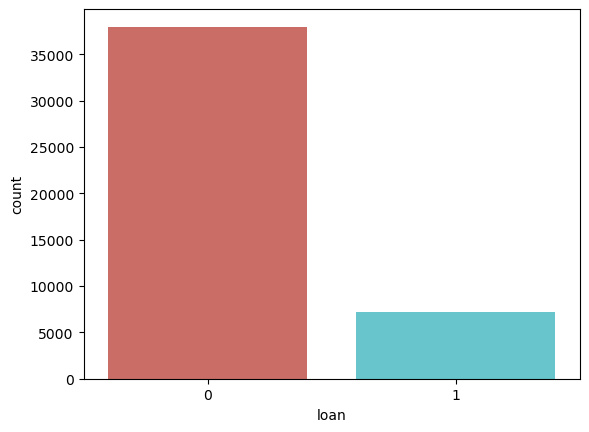

In [64]:
sns.countplot(x='loan',data=bank, palette='hls')

<AxesSubplot:xlabel='housing', ylabel='count'>

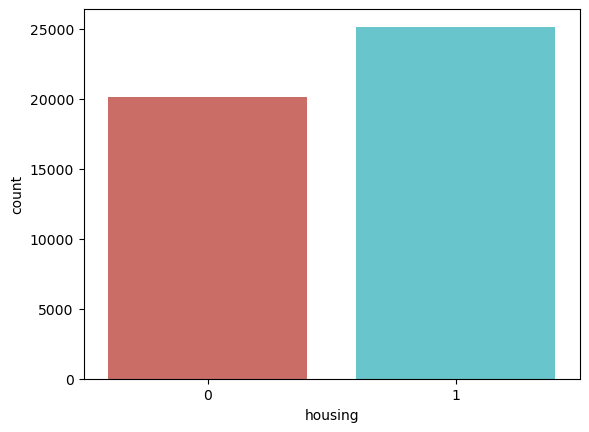

In [65]:
sns.countplot(x='housing',data=bank, palette='hls')

<AxesSubplot:xlabel='default', ylabel='count'>

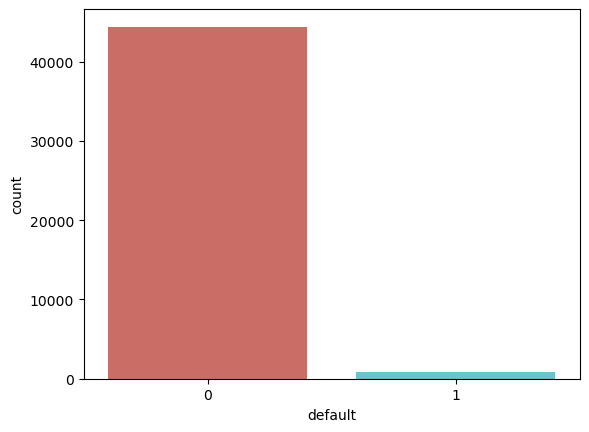

In [66]:
sns.countplot(x='default',data=bank, palette='hls')

<AxesSubplot:xlabel='default', ylabel='count'>

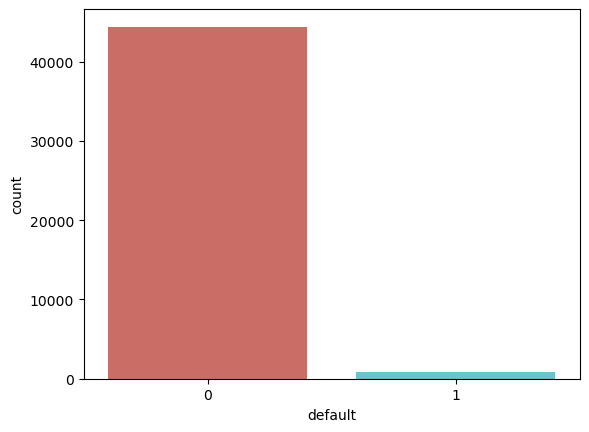

In [67]:
sns.countplot(x='default',data=bank, palette='hls')

In [69]:
bank.sum()

default                                                   815
housing                                                 25130
loan                                                     7244
campaign                                               124956
pdays                                                 1817384
previous                                                26237
y           0000000000000000000000000000000000000000000000...
dtype: object

In [82]:
X = bank.iloc[:,1:].values
Y = bank.iloc[:,0].values

In [83]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [84]:
Y_pred = classifier.predict(X)

In [85]:
Y_pred_df = pd.DataFrame({'Actual': Y,'Predicted': Y_pred})

In [86]:
Y_pred_df

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,0,0
45207,0,0
45208,0,0
45209,0,0


In [87]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(Y, Y_pred)
print(cm)
accuracy_score(Y, Y_pred)

[[44396     0]
 [  815     0]]


0.9819734135497998

In [92]:
from sklearn.metrics import classification_report
print(classification_report(Y,Y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     44396
           1       0.00      0.00      0.00       815

    accuracy                           0.98     45211
   macro avg       0.49      0.50      0.50     45211
weighted avg       0.96      0.98      0.97     45211



C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [93]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [94]:
fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])

In [95]:
auc = roc_auc_score(Y,Y_pred)
print(auc)

0.5


Text(0, 0.5, 'true positive rate')

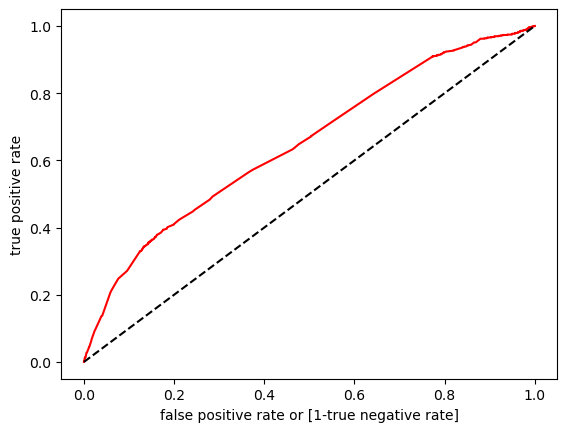

In [96]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color = 'red',label='Logit model(area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('false positive rate or [1-true negative rate]')
plt.ylabel('true positive rate')